# Introduccióna a las redes neuronales convolucionales

En este ejemplo se diseñará una red neuronal convolucional que pueda clasificar digitos escritos a mano.

## Cargar los datos

In [1]:
#Cargar dataset del MNIST

from keras.datasets import mnist

# Cargar dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

El dataset del MNIST contiene digitos del 0 al 9 escritos a mano

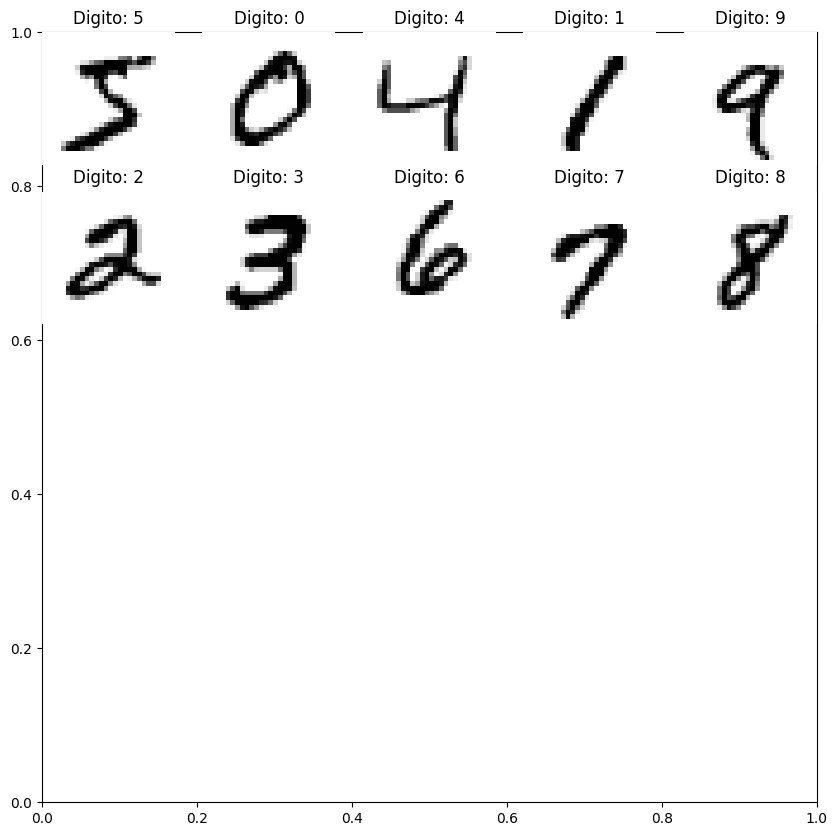

In [2]:
import matplotlib.pyplot as plt
shown_digits = set()

plt.subplots(figsize=(10, 10))
for idx, image in enumerate(train_images):
    if train_labels[idx] not in shown_digits:
        plt.subplot(5, 5, len(shown_digits) + 1)
        plt.imshow(image, cmap=plt.cm.gray_r)
        plt.axis('off')
        plt.title('Digito: %i' % train_labels[idx])
        shown_digits.add(train_labels[idx])
plt.show()

## Prepocesamiento

Cada digito es un arreglo de Numpy de 8 bits sin signo de 28 pixeles de alto y 28 pixeles de anchos

In [3]:
print(f"Dimensiones de la imagen: {train_images[0].shape}, tipo de dato: {train_images[0].dtype}")

Dimensiones de la imagen: (28, 28), tipo de dato: uint8


En este caso tenemos imágenes en escala de grises, Keras nos pide especificar el número de canales en estas imágenes, por lo que tenemos que convertir cada imagen de (28, 28) a (28, 28, 1)

Podemos hacer esto utilizando el método reshape de Numpy

In [4]:
import numpy as np
x = train_images.reshape((-1, 28, 28, 1)) #TODO: Convertir a una imagen de 28x28x1

Otro paso importante de preprocesamiento es la normlización, al tener imagenes de 8 bits sin signo, el valor máximo que un pixel puede alcanzar es 255, vamos a normalizar convertiendo los datos de entrada al tipo float32 y dividiendolos entre 255 para tener pixeles en el rango de $[0, 1]$ 

In [5]:
x = x.astype('float32') #TODO: Convertir a float32
x = x / 255.0 #TODO: Normalizar los valores entre 0 y 1

Las salidas en nuestro caso es el digito al que corresponde la imagen de entrada, vamos a resolver el problema utilizando clasificación multiclase, por lo que aplicaremos one hot encoding para codificar las etiquetas

In [6]:
from keras.utils import to_categorical

y = to_categorical(train_labels, num_classes=10)

## Definir la arquitectura de la red

Para este problema utilizaremos la aquitectura LeNet-5.

LeNet-5 es una arquitectura de red neuronal convolucional (CNN) que fue desarrollada por Yann LeCun en 1998. 

Fue una de las primeras CNNs exitosas y se utilizó principalmente para tareas de reconocimiento de dígitos escritos a mano, como el reconocimiento de caracteres numéricos en cheques bancarios.

La arquitectura LeNet-5 consta de las siguientes capas principales:

- La primera capa convolucional aplica 6 filtros de 5x5 píxeles. 
    Se utilizan funciones de activación tipo ReLU (Rectified Linear Unit) después de cada convolución.

- Después de la primera capa convolucional, LeNet-5 utiliza capas de pooling de 2x2 pixeles para reducir la dimensionalidad.

- Después de la capa de pooling, se aplica una segunda capa convolucional con 16 filtros de 5x5 píxeles.
    Al igual que en la primera capa convolucional, se utilizan funciones de activación ReLU.

- Se aplica otra capa de pooling para reducir la dimensionalidad antes de la capa completamente conectada.

- Después de las capas convolucionales y de pooling, se conectan dos capas completamente conectadas (fully connected) con 120 y 84 neuronas, respectivamente.
Se utilizan funciones de activación ReLU en estas capas.

- La capa de salida consiste en un conjunto de neuronas igual al número de clases de salida en la tarea.

`NOTA: Recuerde que antes de la primer capa totalmente conectada se utiliza una capa Flatten`

In [7]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

#TODO: Crear el modelo
model = Sequential()
model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\HUAWEI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
#TODO: Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#TODO: Entrenar el modelo
model.fit(x, y, epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7962 - loss: 0.7056
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9669 - loss: 0.1102
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9796 - loss: 0.0687
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9831 - loss: 0.0552
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9864 - loss: 0.0429
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9884 - loss: 0.0368
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9908 - loss: 0.0293
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9911 - loss: 0.0277
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9925 - loss: 0.0235
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9929 - loss: 0.0217


In [10]:
#TODO: Evaluar el modelo con los datos de test
test_loss, test_acc = model.evaluate(x, y)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9948 - loss: 0.0163
Test accuracy: 0.994533360004425
Test loss: 0.017184991389513016


In [11]:
#TODO: Guardar el modelo
model.save('mnist_cnn.h5')